In [25]:
%matplotlib widget

In [26]:
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.colors import LogNorm
import os, glob

import seaborn as sns
mako = sns.color_palette("mako", as_cmap=True)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150
plt.ioff()

In [27]:
data = {} # data[L, p] contains (fail_rate, density)
for f in glob.glob('data/run_6/run_6_*_*.npy'):
    L = int(f.split("_")[3])
    p = int(f.split("_")[4].split(".")[0])
    data[L, p] = np.load(f, allow_pickle = True)

In [28]:
plotting_array = np.empty((5, 10), dtype = object)
for L, p in data:
    plotting_array[L//20-1,p-1] = data[L, p]

In [29]:
fail_rate = np.zeros((5, 10))
density = np.empty((5, 10), dtype = np.ndarray)
for i in range(5):
    for j in range(10):
        fail_rate[i, j] = plotting_array[i, j][0]
        density[i, j] = plotting_array[i, j][1]

In [30]:
L_ticks = np.linspace(20, 100, 5).astype(int)
p_ticks = np.linspace(1, 10, 10) / 1000
p_labels = p_ticks # Spaghetti code

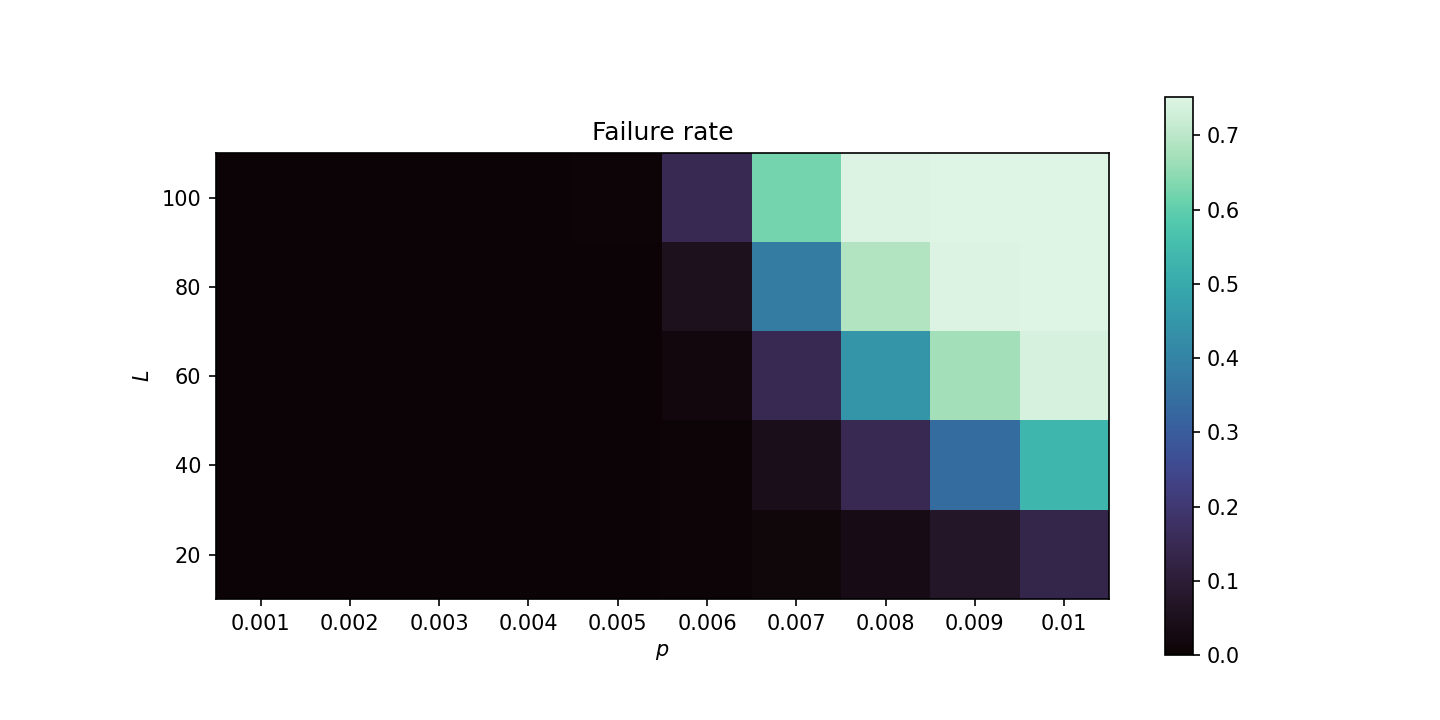

In [31]:
plt.matshow(fail_rate, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Failure rate")
plt.ylabel("$L$")
plt.xlabel("$p$")
plt.yticks(range(5), L_ticks)
plt.xticks(range(10), p_labels)
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run6_fail_heatmap.png")
plt.show()

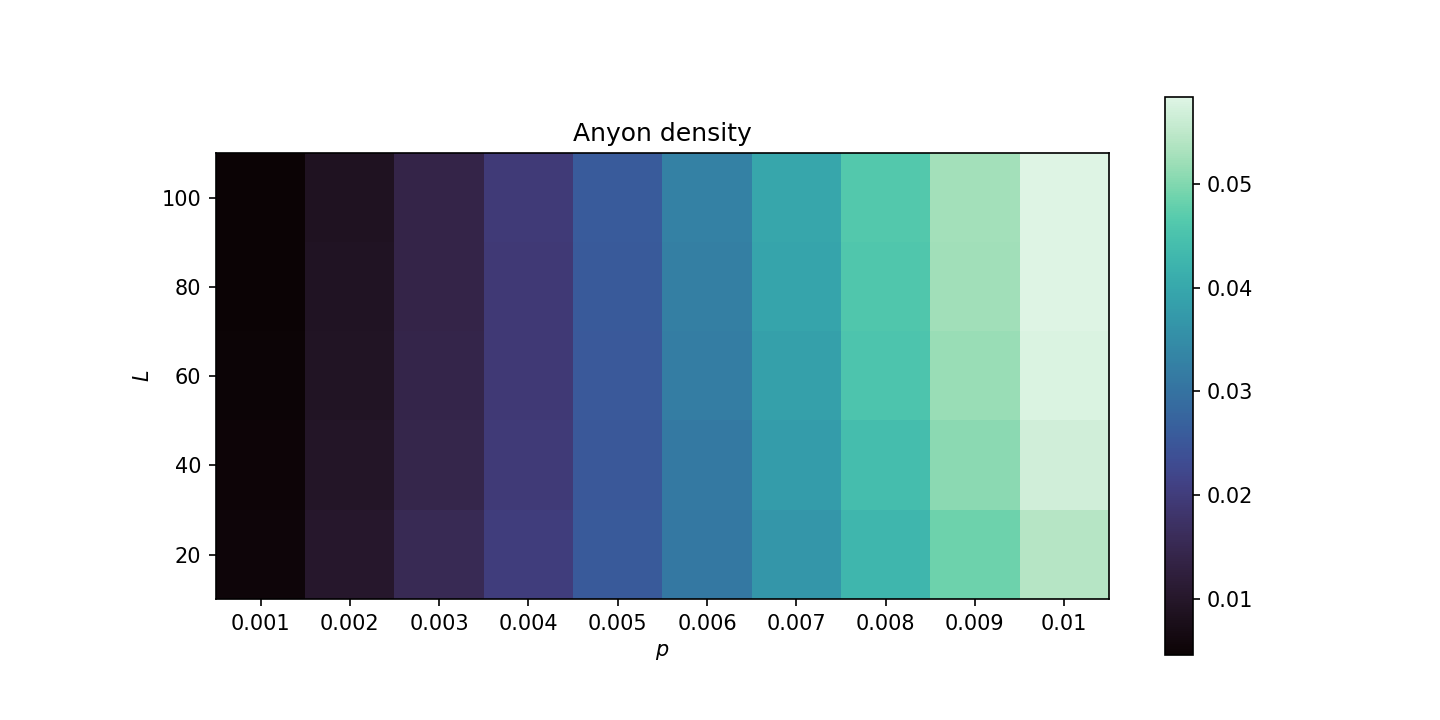

In [32]:
final_density = np.zeros((5, 10))
for i in range(5):
    for j in range(10):
        final_density[i, j] = density[i, j][-1]
plt.matshow(final_density, cmap = mako, origin = 'lower')
plt.colorbar()
plt.title("Anyon density")
plt.ylabel("$L$")
plt.xlabel("$p$")
plt.yticks(range(5), L_ticks)
plt.xticks(range(10), p_labels)
ax = plt.gca()
ax.xaxis.tick_bottom()
plt.savefig("plots/run6_density_heatmap.png")
plt.show()

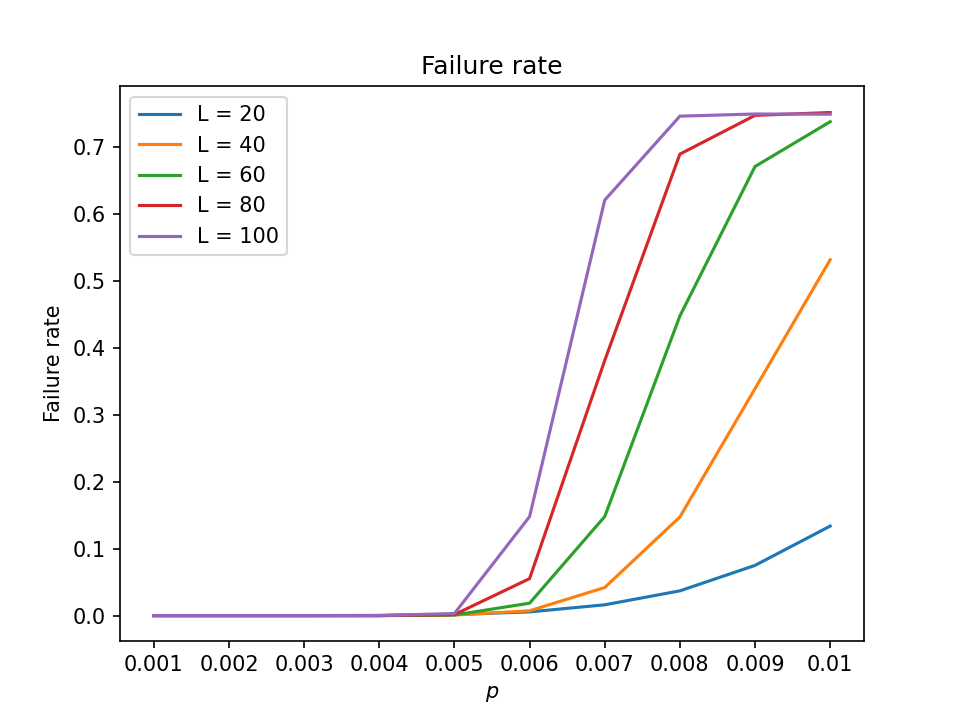

In [34]:
for i in range(5):
    L = 20*(i+1)
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    error = np.sqrt(fail_rate[i] * (1 - fail_rate[i])) / np.sqrt(100000)
    plt.fill_between(p_ticks, fail_rate[i]-error, fail_rate[i]+error, alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.xticks(p_ticks, p_labels)
plt.savefig("plots/run6_fail_linear.png")
plt.show()

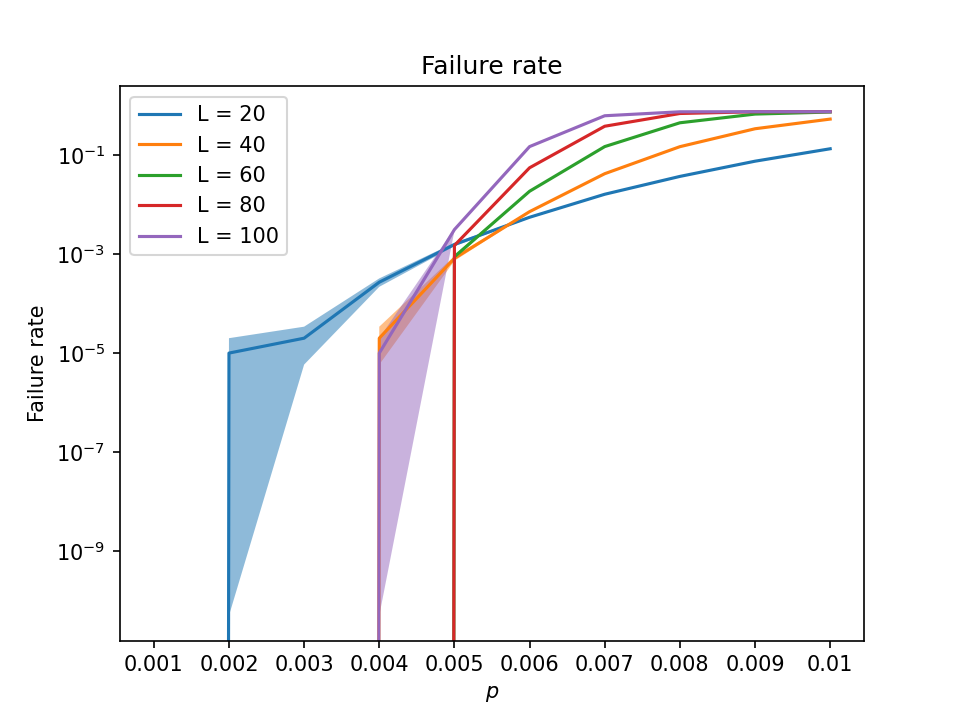

In [35]:
for i in range(5):
    L = 20*(i+1)
    plt.plot(p_ticks, fail_rate[i], label = f"L = {L}")
    error = np.sqrt(fail_rate[i] * (1 - fail_rate[i])) / np.sqrt(100000)
    plt.fill_between(p_ticks, fail_rate[i]-error, fail_rate[i]+error, alpha = 0.5)
plt.legend()
plt.title("Failure rate")
plt.xlabel("$p$")
plt.ylabel("Failure rate")
plt.yscale('log')
plt.xticks(p_ticks, p_labels)
plt.savefig("plots/run6_fail_log.png")
plt.show()

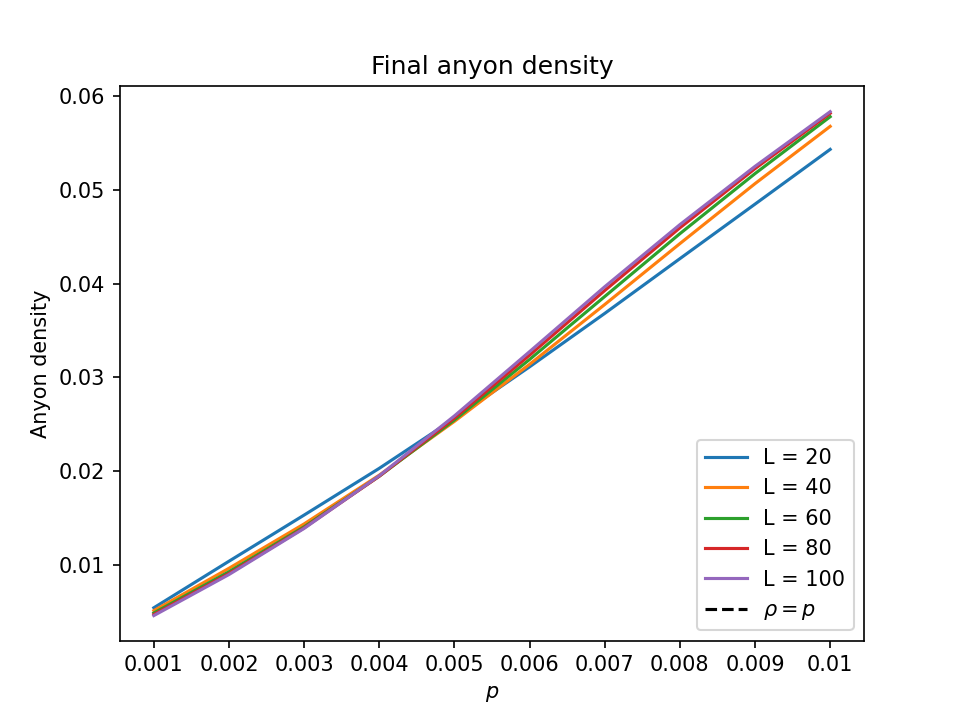

In [37]:
for i in range(5):
    L = 20*(i+1)
    plt.plot(p_ticks, final_density[i], label = f"L = {L}")
    error = np.sqrt(final_density[i] * (1 - final_density[i])) / (np.sqrt(100000) * L)
    plt.fill_between(p_ticks, final_density[i]-error, final_density[i]+error, alpha = 0.5)
plt.plot([p_ticks[0], p_ticks[0]], [p_ticks[-1], p_ticks[-1]], 'k--', label = r"$\rho=p$")
plt.title("Final anyon density")
plt.xlabel("$p$")
plt.ylabel("Anyon density")
plt.xticks(p_ticks, p_labels)
plt.legend(loc = 'lower right')
plt.savefig("plots/run6_density_final.png")
plt.show()

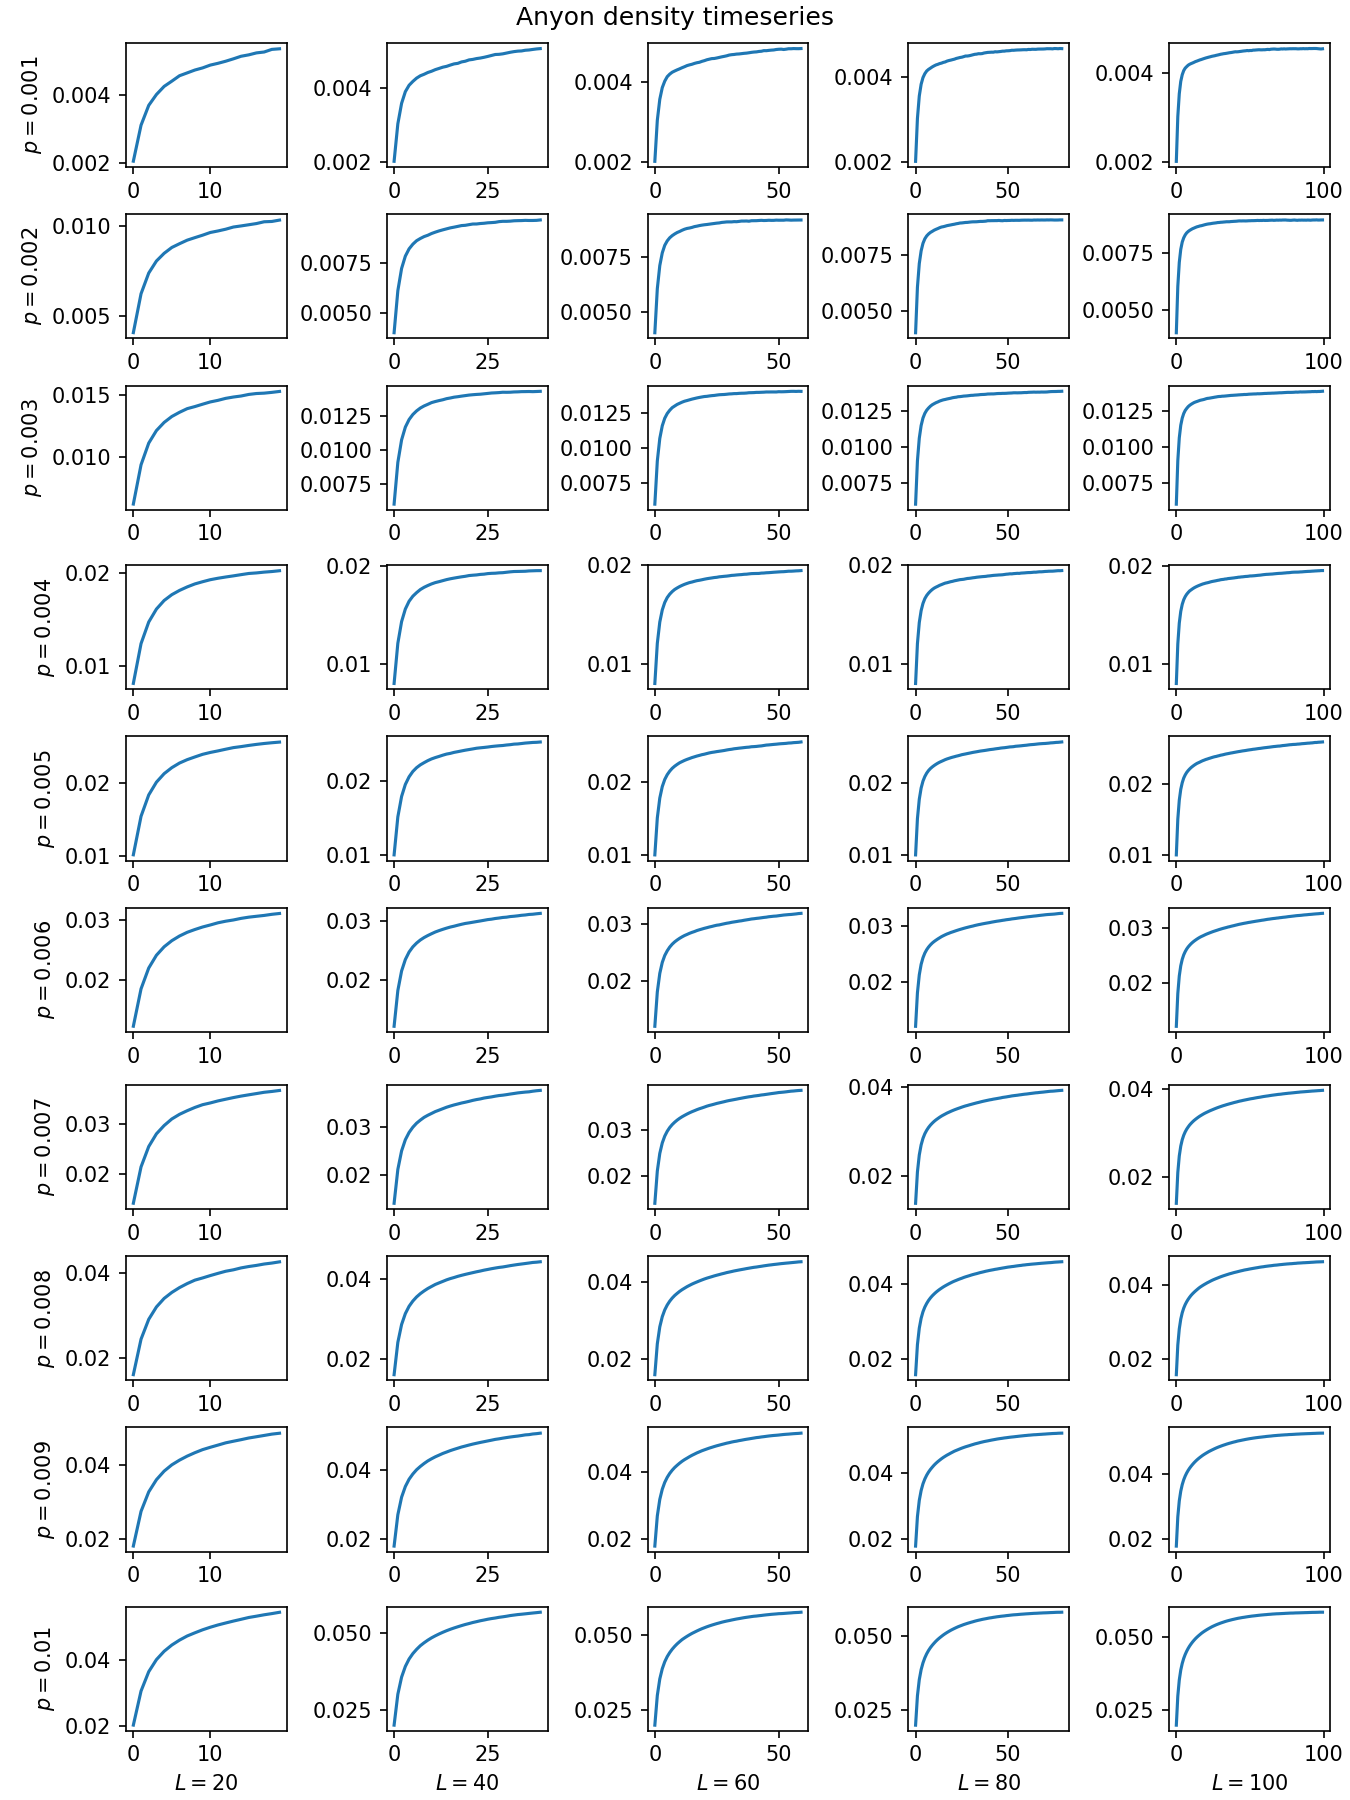

In [42]:
fig, ax = plt.subplots(10, 5, layout = "constrained", figsize = (9, 12))
for i in range(5):
    for j in range(10):
        L = 20*(i+1)
        p = p_ticks[j]
        ax[j, i].plot(density[i, j])
        error = np.sqrt(density[i, j] * (1 - density[i, j])) / (np.sqrt(100000) * L)
        ax[j, i].fill_between(range(error.shape[0]), density[i, j]-error, density[i, j]+error, alpha = 0.5)

# Hacky
for i in range(10):
    ax[i, 0].set_ylabel(f"$p={p_labels[i]}$")
for i in range(5):
    ax[-1, i].set_xlabel(f"$L={L_ticks[i]}$")

fig.suptitle("Anyon density timeseries")

plt.savefig("plots/run6_density_timeseries.png")
plt.show()

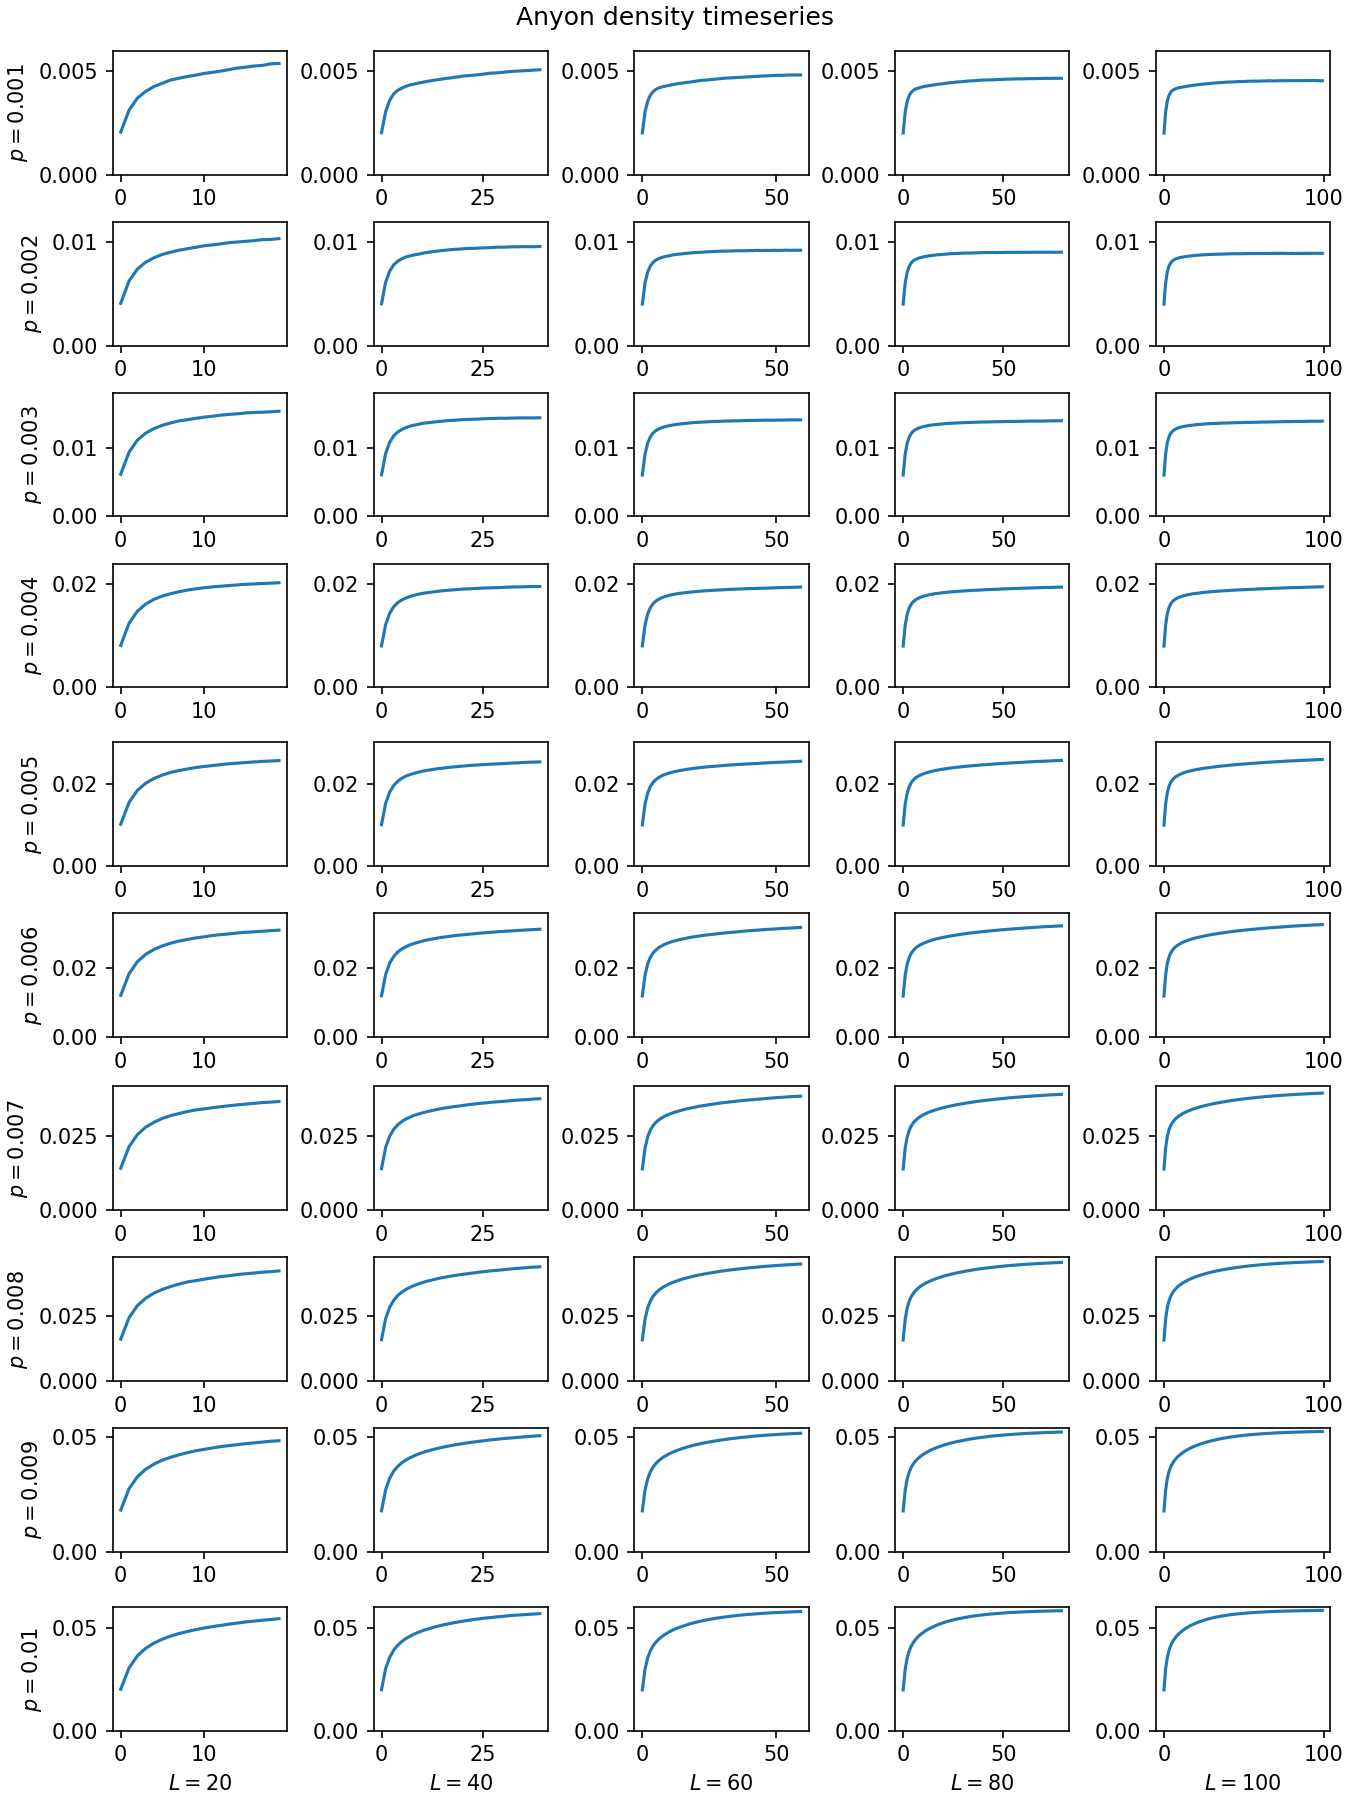

In [43]:
fig, ax = plt.subplots(10, 5, layout = "constrained", figsize = (9, 12))
for i in range(5):
    for j in range(10):
        L = 20*(i+1)
        p = p_ticks[j]
        ax[j, i].plot(density[i, j])
        error = np.sqrt(density[i, j] * (1 - density[i, j])) / (np.sqrt(100000) * L)
        ax[j, i].fill_between(range(error.shape[0]), density[i, j]-error, density[i, j]+error, alpha = 0.5)
        ax[j, i].set_ylim(0, 6 * p)

# Hacky
for i in range(10):
    ax[i, 0].set_ylabel(f"$p={p_labels[i]}$")
for i in range(5):
    ax[-1, i].set_xlabel(f"$L={L_ticks[i]}$")

fig.suptitle("Anyon density timeseries")

plt.savefig("plots/run6_density_timeseries_normalized.png")
plt.show()